# EXERCISES 5 - 30/10/2023

In [60]:
from math import gcd as GCD
import numpy as np
from matplotlib import pyplot as plt
from mylib.basics import sturges

## Exercise 5.1
Create a python library that implements the Fraction class, containing its constructor, the data members to save numerator and denominator, and the class method that returns the division between the numerator and the denominator

In [14]:
class Fraction:
    def __init__(self,num: int,den: int):
        self.num: int = num
        self.den: int = den
        self.simplify()

    def division(self) -> float:
        return float(self.num)/self.den
    
    def simplify(self):
        gcd = GCD(self.num,self.den)
        self.num /= gcd
        self.den /= gcd
    
    def __str__(self):
        return f"{int(self.num)}/{int(self.den)}"

## Exercise 5.2

Implement a test function of the class inside the library file itself, that verifies the output of each method of the class, and that prints on screen the value of the numerator and of the denominator of a fraction

In [16]:
f1 = Fraction(5,2)
f2 = Fraction(4,2)

print(f1.division())
print(f2.division())

print(f1)
print(f2)

2.5
2.0
5/2
2/1


## Exercise 5.3
Add to the Fraction class the overloading of the +, -, *, / operations in such a way that each of them returns an object of the type Fraction.

Add to the test function the call to all the new methods and the verification of their behaviour.

In [47]:
class Fraction:
    def __init__(self,num: int,den: int):
        self.num: int = int(num)
        self.den: int = int(den)
        self.simplify()

    def division(self) -> float:
        return float(self.num)/self.den
    
    def __add__(self,b:Fraction) -> Fraction:
        gcd: int = GCD(self.den,b.den)
        lcm: int = int(self.den/gcd * b.den)
        num = self.num*(lcm/self.den) + b.num*(lcm/b.den)
        return Fraction(num,lcm)
    
    def __sub__(self,b: Fraction):
        gcd: int = GCD(self.den,b.den)
        lcm: int = self.den/gcd * b.den
        num = self.num*(lcm/self.den) - b.num*(lcm/b.den)
        return Fraction(num,lcm)
    
    def __mul__(self,b: Fraction):
        num = self.num
        den = self.den
        gcd = GCD(num,b.den)
        num /= gcd
        bden = b.den/gcd
        gcd = GCD(den,b.num)
        den /= gcd
        bnum = b.num/gcd
        return Fraction(num*bnum,den*bden)
    
    def __truediv__(self,b: Fraction):
        return self.__mul__(Fraction(b.den,b.num))

    def __str__(self):
        return f"{int(self.num)}/{int(self.den)}"
    
    def simplify(self):
        gcd = GCD(self.num,self.den)
        self.num = int(self.num/gcd)
        self.den = int(self.den/gcd)

In [48]:
f1 = Fraction(5,3)
f2 = Fraction(4,15)

print(f1)
print(f2)
print(f1+f2)
print(f1-f2)
print(f1*f2)
print(f1/f2)

5/3
4/15
29/15
7/5
4/9
25/4


## Exercise 5.4
Write a python program that reads the sample file eventi_unif.txt of Exercise 3.2 and, using the filter function, creates two different sub-sets of events containing those larger or smaller than the average respectively, using lambda functions in the process.

Show that the sigma of the two subsets is half the one of the parent sample.

In [58]:
data = np.loadtxt('data/eventi_unif.txt', dtype=np.float64)

m = np.average(data)
std = np.std(data)

# smaller = np.array(list(filter(lambda x: x < m, data)))
# larger  = np.array(list(filter(lambda x: x > m, data)))

# numpy style
smaller = data[(data<m)]
larger = data[(data>m)]

sstd = np.std(smaller)
lstd = np.std(larger)

print(data[:5])
print('Average: ',m)
print(smaller[:5])
print(larger[:5])
print('sigma data: ',std)
print('sigma smaller: ',sstd)
print('sigma larger:  ',lstd)

[ 1.74343   0.881333 -1.4281    2.94428  -1.40717 ]
Average:  1.5082904156312
[ 0.881333 -1.4281   -1.40717  -3.22005   0.547841]
[1.74343 2.94428 2.73867 3.56551 3.55342]
sigma data:  3.1776809689426666
sigma smaller:  1.5834337370648714
sigma larger:   1.5748388014000654


## Exercise 5.5
Write a python program that reads the sample file eventi_gauss.txt of Exercise 3.3 and, using the map function, creates the distribution of the squares and cubes of random Gaussian numbers, respectively, using lambda functions in the process.

Plot the distribution of them, together with the original sample one, all in the same frame.

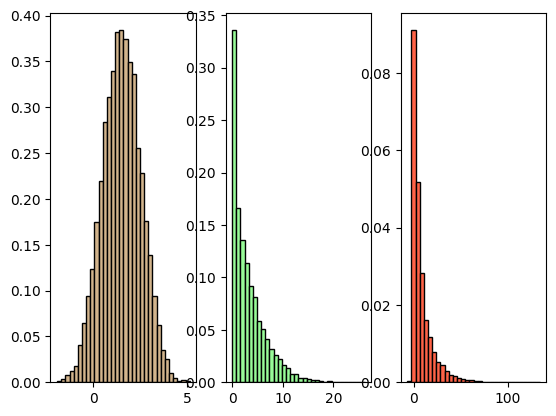

In [64]:
dg = np.loadtxt('data/eventi_gauss.txt',dtype=np.float64)

dg2 = np.array(list(map(lambda x: x**2, dg)))
dg3 = np.array(list(map(lambda x: x**3, dg)))

# numpy style
# dg2 = dg**2
# dg3 = dg**3

ax, fig = fig, ax = plt.subplots (nrows = 1, ncols = 3)
ax[0].hist(dg,bins=sturges(len(data)),color='tan',edgecolor = 'black', density=True)
ax[1].hist(dg2,bins=sturges(len(data)),color='palegreen',edgecolor = 'black', density=True)
ax[2].hist(dg3,bins=sturges(len(data)),color='tomato',edgecolor = 'black', density=True)
plt.show()